In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [2]:
# Load the data
df = pd.read_csv('delhiaqi.csv')

In [3]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [4]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [5]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

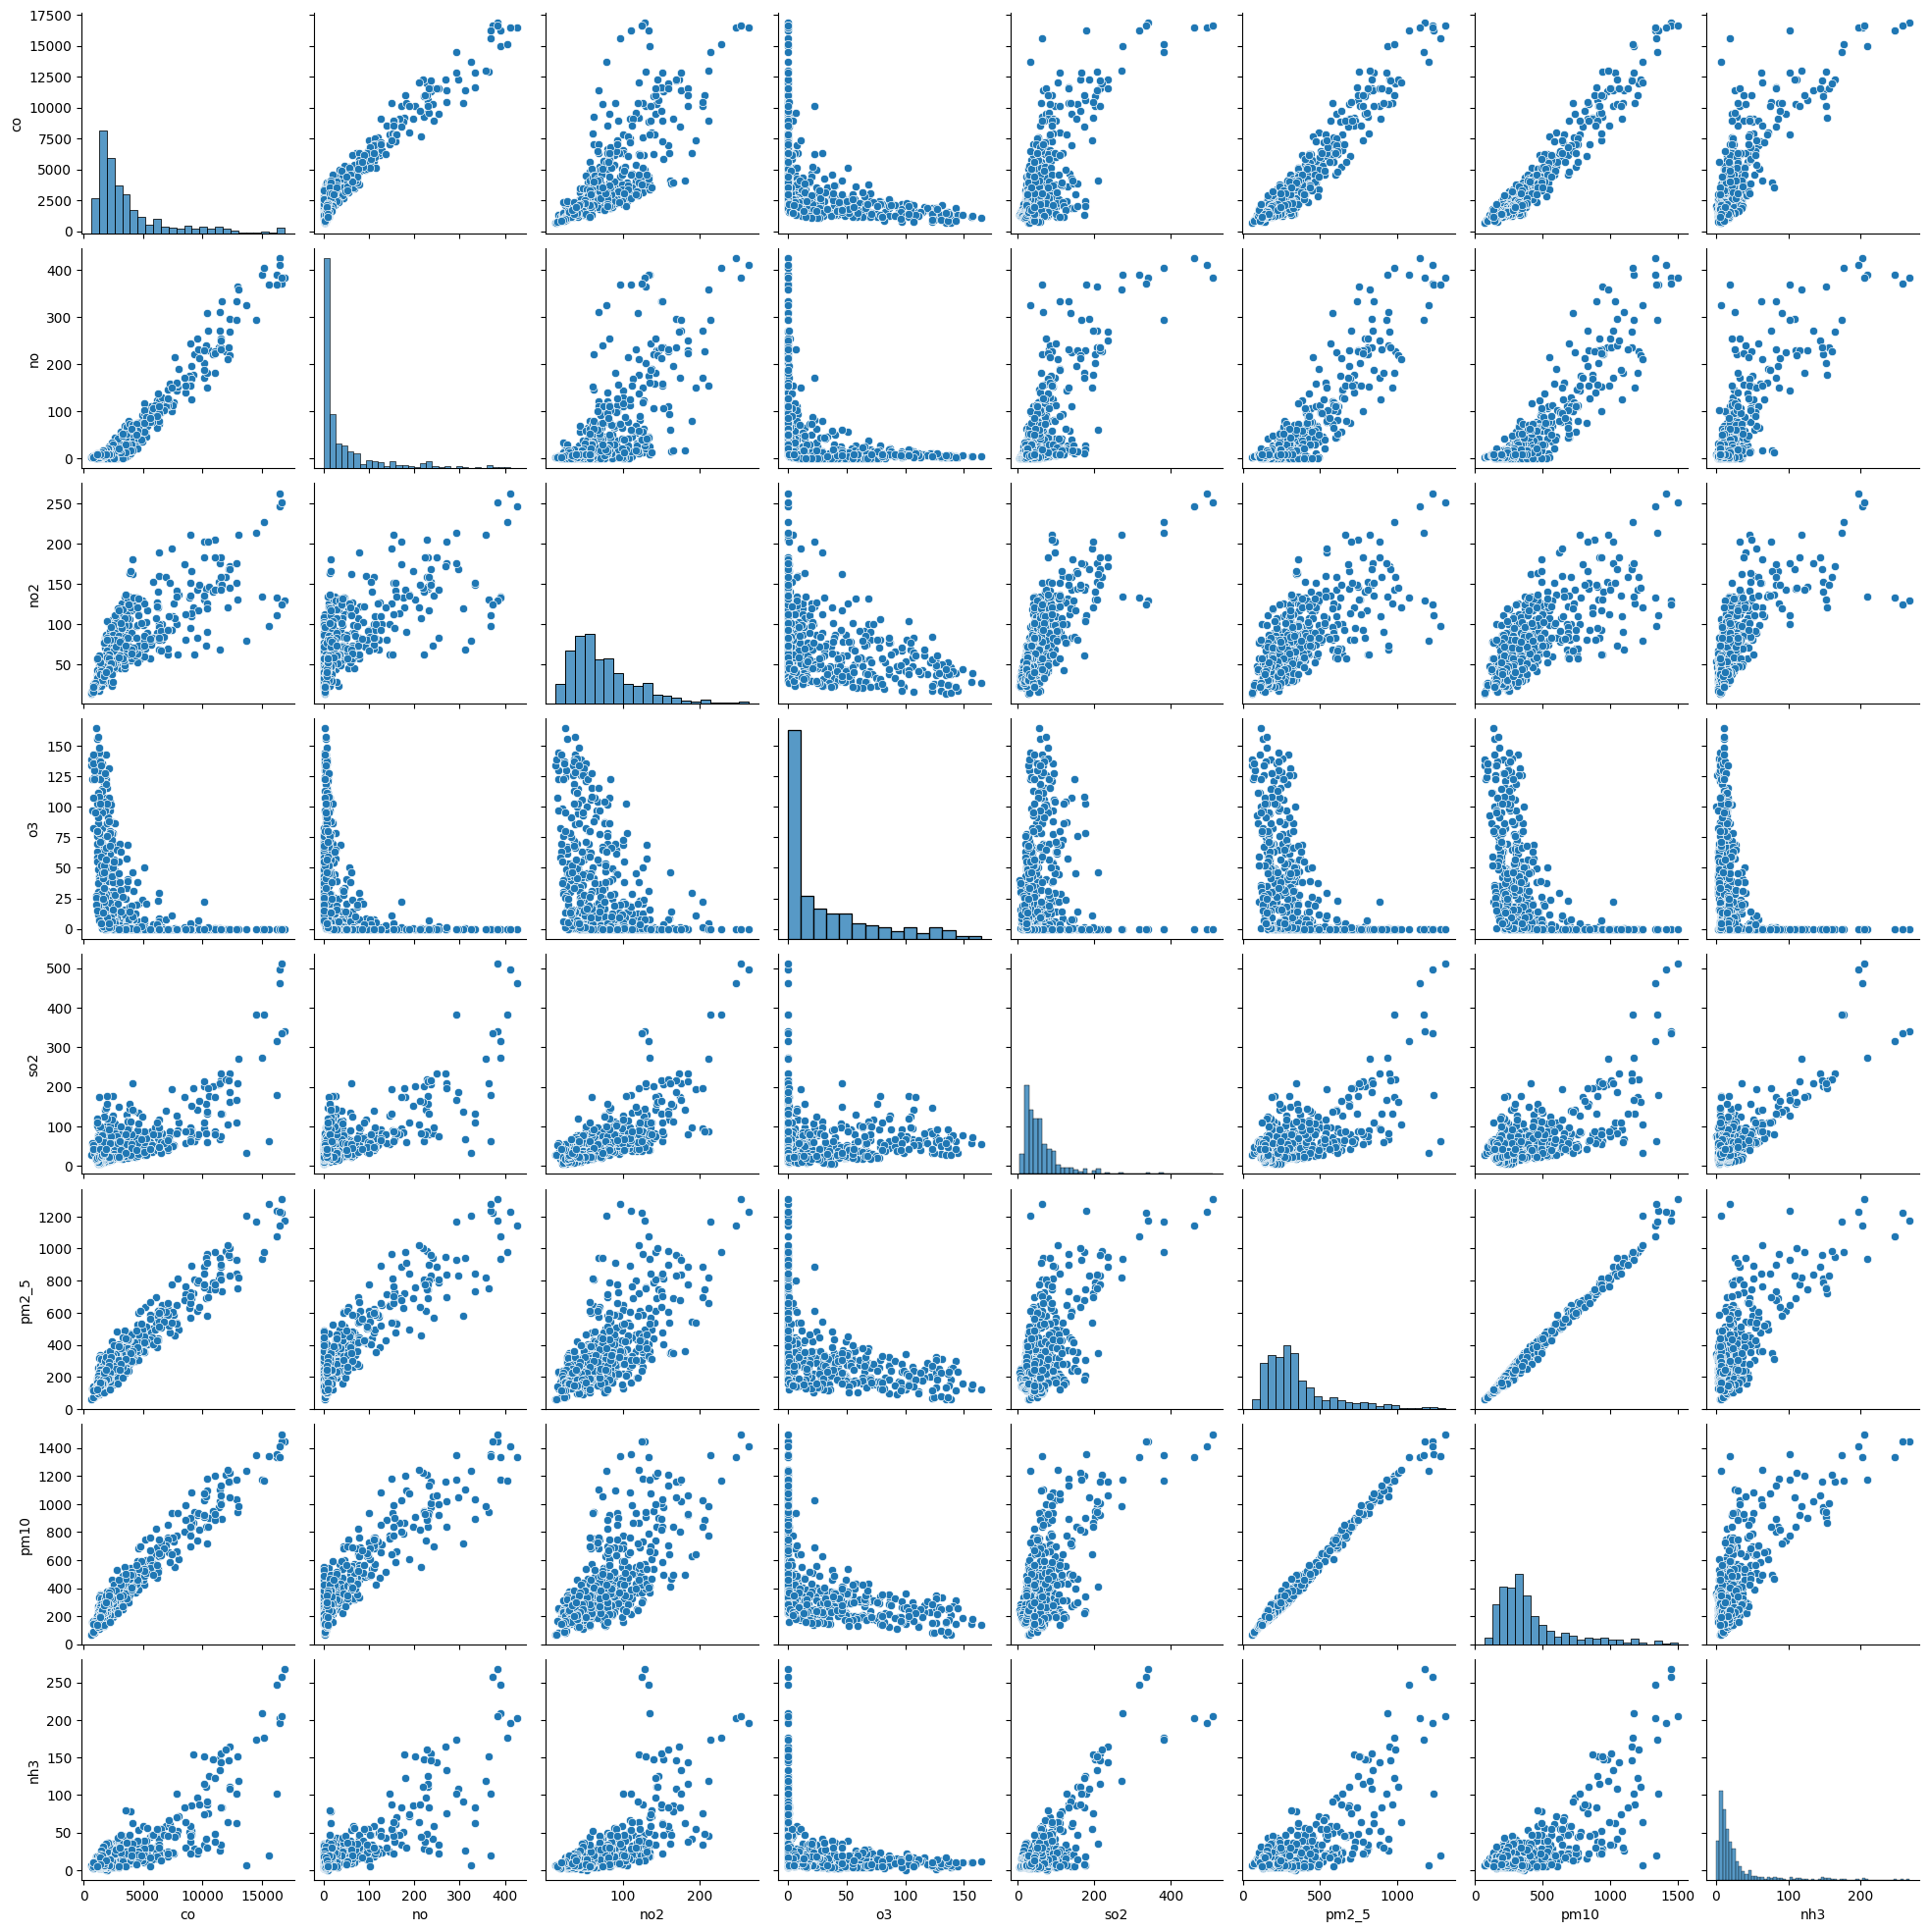

In [6]:
sns.pairplot(df)

In [7]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Check the first few rows and data types
print(df.head())
print(df.dtypes)

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  
date     datetime64[ns]
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object


In [9]:
# Check for missing values
print(df.isnull().sum())


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [10]:
# Summary statistics
print(df.describe())

                      date            co          no         no2          o3  \
count                  561    561.000000  561.000000  561.000000  561.000000   
mean   2023-01-12 16:00:00   3814.942210   51.181979   75.292496   30.141943   
min    2023-01-01 00:00:00    654.220000    0.000000   13.370000    0.000000   
25%    2023-01-06 20:00:00   1708.980000    3.380000   44.550000    0.070000   
50%    2023-01-12 16:00:00   2590.180000   13.300000   63.750000   11.800000   
75%    2023-01-18 12:00:00   4432.680000   59.010000   97.330000   47.210000   
max    2023-01-24 08:00:00  16876.220000  425.580000  263.210000  164.510000   
std                    NaN   3227.744681   83.904476   42.473791   39.979405   

              so2        pm2_5         pm10         nh3  
count  561.000000   561.000000   561.000000  561.000000  
mean    64.655936   358.256364   420.988414   26.425062  
min      5.250000    60.100000    69.080000    0.630000  
25%     28.130000   204.450000   240.900000    

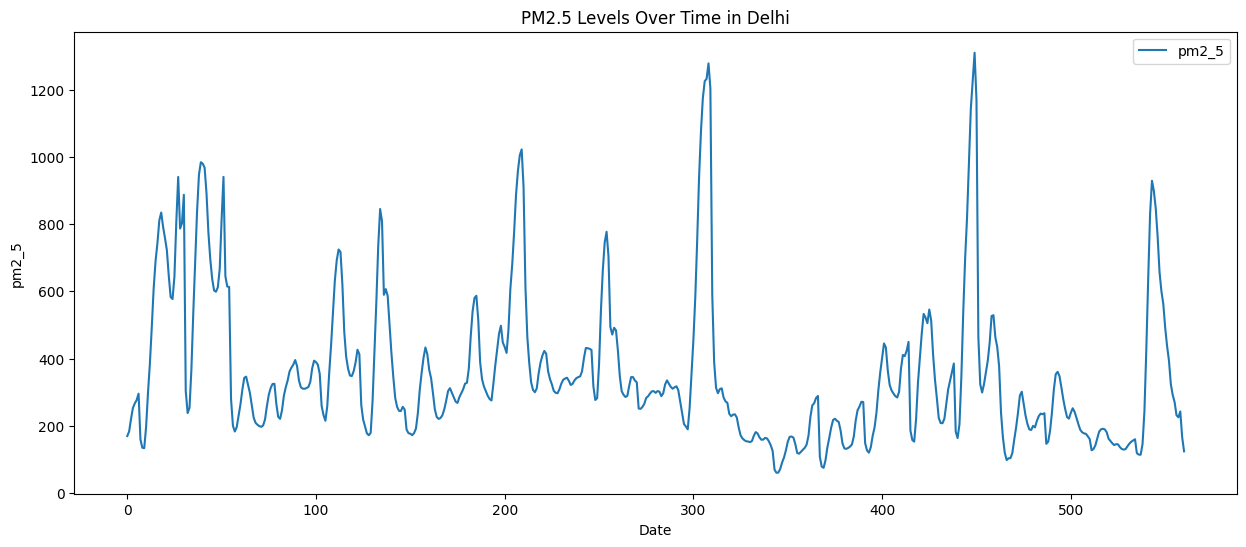

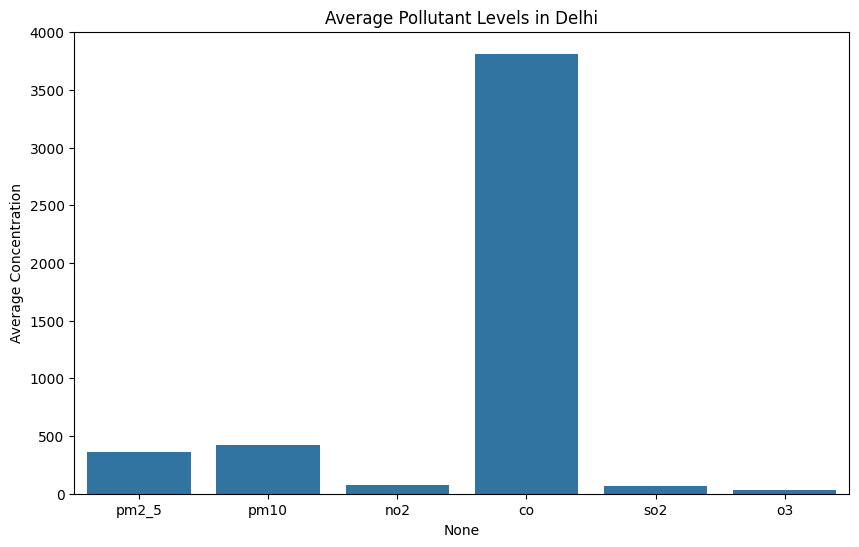

In [13]:
# Time series plot for PM2.5
plt.figure(figsize=(15, 6))
plt.plot(df['pm2_5'], label='pm2_5')
plt.title('PM2.5 Levels Over Time in Delhi')
plt.xlabel('Date')
plt.ylabel('pm2_5')
plt.legend()
plt.show()

# Bar plot for average levels of different pollutants
pollutants = ['pm2_5', 'pm10', 'no2', 'co', 'so2', 'o3']
avg_pollutants = df[pollutants].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pollutants.index, y=avg_pollutants.values)
plt.title('Average Pollutant Levels in Delhi')
plt.ylabel('Average Concentration')
plt.show()

In [77]:
#Time series plot for each pollutant
fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=df['date'], y=df[pollutant], mode='lines',
                             name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Delhi',
                  xaxis_title='Date', yaxis_title='Concentration (µg/m³)')
fig.show()

In [78]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

In [82]:
# Calculate AQI for each row
df['AQI'] = df.apply(calculate_overall_aqi, axis=1)

In [83]:
# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

In [84]:
# Categorize AQI
df['AQI Category'] = df['AQI'].apply(categorize_aqi)
print(df.head())

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  AQI    AQI Category  
0   5.83  300  Very Unhealthy  
1   7.66  300  Very Unhealthy  
2  11.40  400       Hazardous  
3  13.55  400       Hazardous  
4  14.19  400       Hazardous  


In [87]:
#Bar plot of AQI over time
fig = px.bar(df, x="date", y="AQI",
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

Trend Analysis - AQI over time

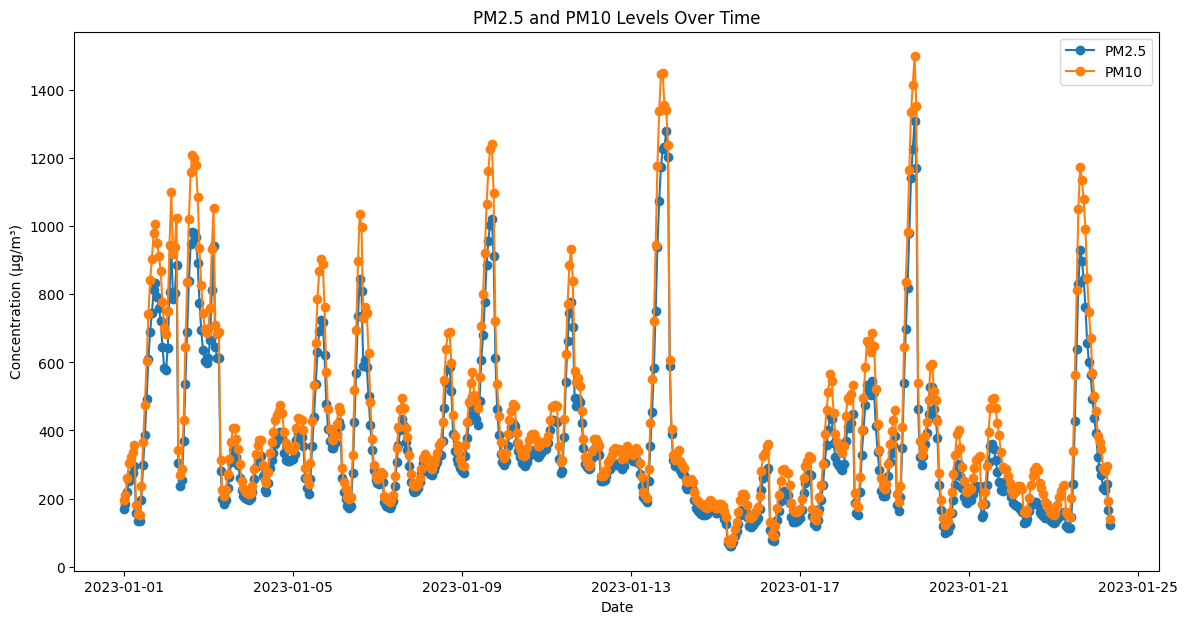

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['pm2_5'], label='PM2.5', marker='o')
plt.plot(df['date'], df['pm10'], label='PM10', marker='o')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('PM2.5 and PM10 Levels Over Time')
plt.legend()
plt.show()


Pollutant Contribution to AQI

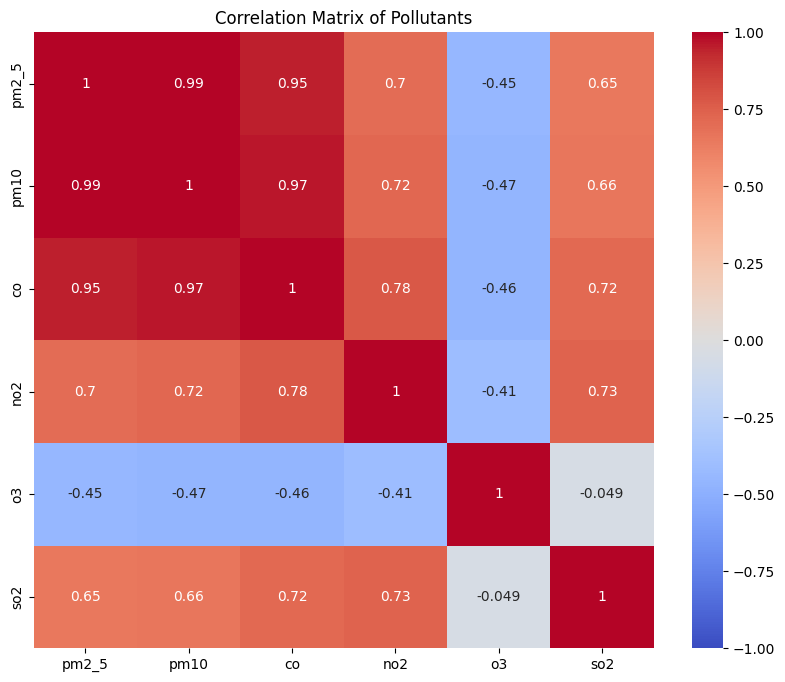

In [ ]:
pollutants = ['pm2_5', 'pm10', 'co', 'no2', 'o3', 'so2']
df_corr = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Pollutants')
plt.show()

Calculate AQI based on PM2.5 and PM10

In [ ]:

def calculate_aqi(pm25, pm10):
    c = [pm25, pm10]
    c_low = [0, 0]
    c_high = [12, 55]
    i_low = [0, 51]
    i_high = [50, 100]

    aqi = []
    for idx in range(len(c)):
        conc = c[idx]
        clow = c_low[idx]
        chigh = c_high[idx]
        ilow = i_low[idx]
        ihigh = i_high[idx]

        aqi.append(((ihigh - ilow)/(chigh - clow)) * (conc - clow) + ilow)

    return max(aqi)

df['AQI'] = df.apply(lambda row: calculate_aqi(row['pm2_5'], row['pm10']), axis=1)


Impact of Time of Day - Hourly AQI trends

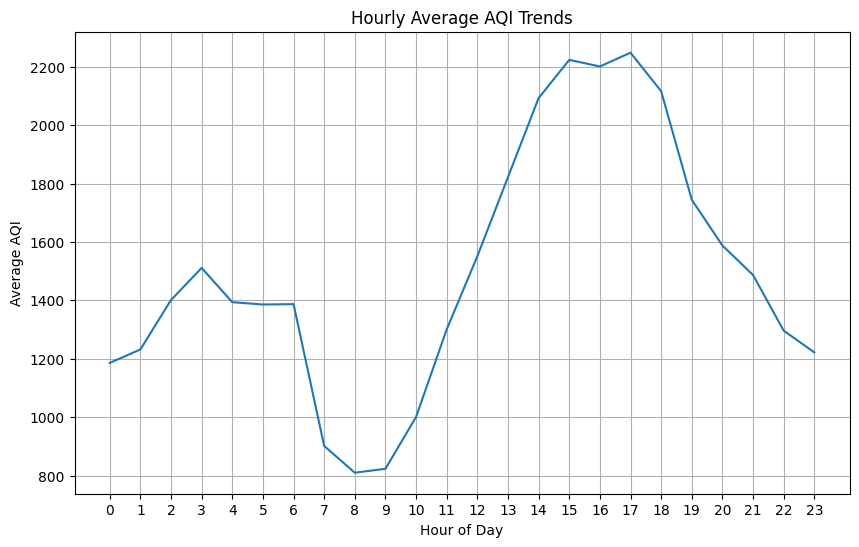

In [ ]:
hourly_avg = df.groupby('hour')['AQI'].mean().reset_index()  # Reset index to convert Series to DataFrame

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x='hour', y='AQI')
plt.xlabel('Hour of Day')
plt.ylabel('Average AQI')
plt.title('Hourly Average AQI Trends')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [ ]:
# High AQI Events - Characteristics of days with highest AQI
high_aqi_days = df[df['AQI'] > 100]  # Example threshold

Box plot of pollutants on high AQI days

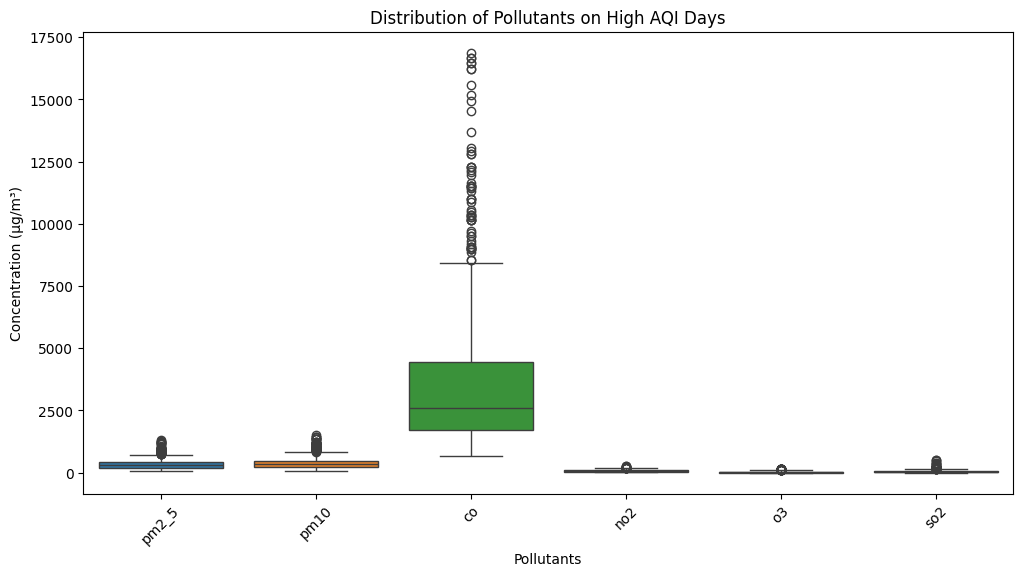

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=high_aqi_days[pollutants])
plt.xlabel('Pollutants')
plt.ylabel('Concentration (µg/m³)')
plt.title('Distribution of Pollutants on High AQI Days')
plt.xticks(rotation=45)
plt.show()

Impact of Public Holidays on AQI

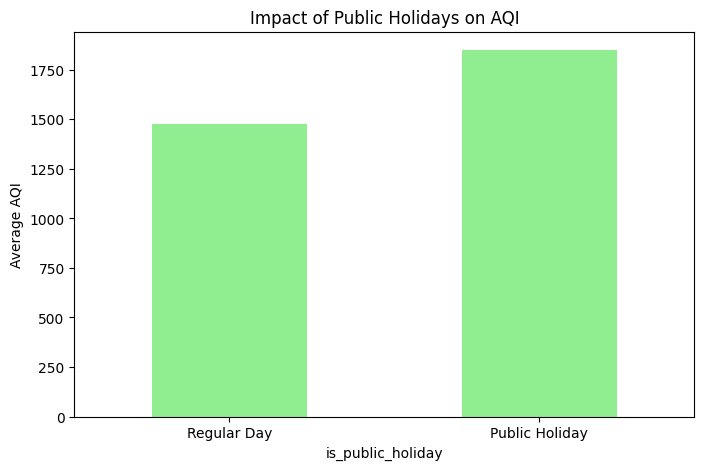

In [ ]:

public_holidays = ['2023-01-01', '2023-01-26', '2023-08-15']  # Example public holidays

df['is_public_holiday'] = df['date'].dt.date.astype(str).isin(public_holidays).astype(int)
avg_aqi_on_holidays = df.groupby('is_public_holiday')['AQI'].mean()

plt.figure(figsize=(8, 5))
avg_aqi_on_holidays.plot(kind='bar', color='lightgreen')
plt.xticks(range(2), ['Regular Day', 'Public Holiday'], rotation=0)
plt.ylabel('Average AQI')
plt.title('Impact of Public Holidays on AQI')
plt.show()


AQI Trends by Day of Week

<ipython-input-54-80b666ac70ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_aqi_by_day_of_week.index, y=avg_aqi_by_day_of_week.values, palette='Set2')


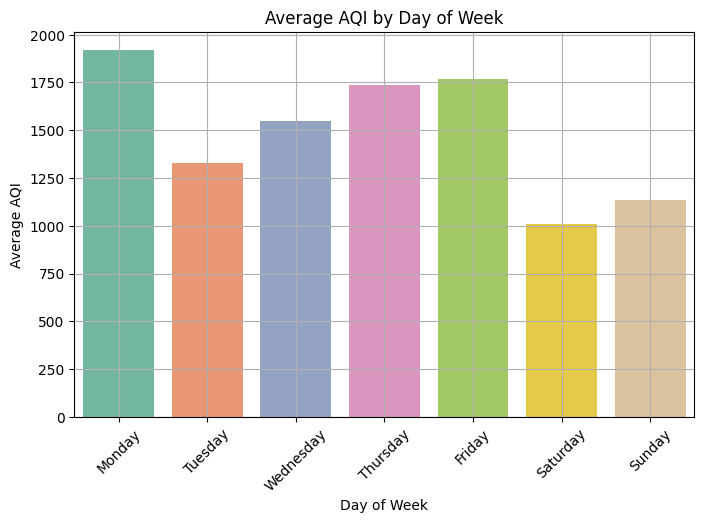

In [ ]:

df['day_of_week'] = df['date'].dt.weekday  # Monday=0, Sunday=6
avg_aqi_by_day_of_week = df.groupby('day_of_week')['AQI'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_aqi_by_day_of_week.index, y=avg_aqi_by_day_of_week.values, palette='Set2')
plt.xlabel('Day of Week')
plt.ylabel('Average AQI')
plt.title('Average AQI by Day of Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.grid(True)
plt.show()


Long-term Trends in Key Pollutants - Line plots

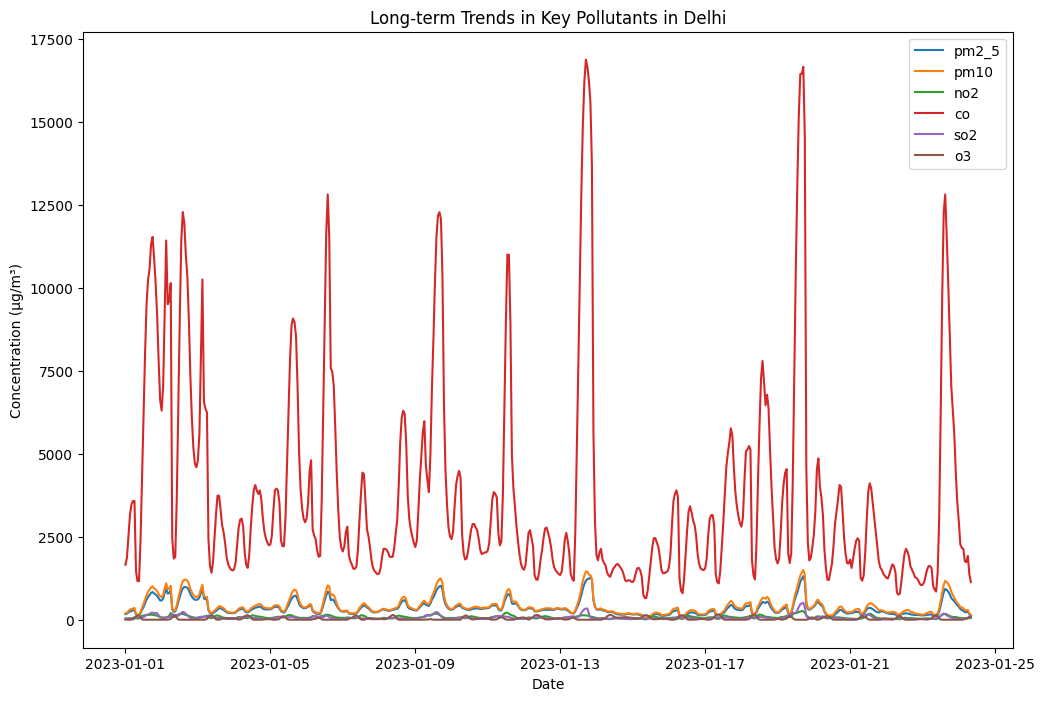

In [19]:
# Long-term Trends in Key Pollutants - Line plots
plt.figure(figsize=(12, 8))
for pollutant in pollutants:
    sns.lineplot(data=df, x='date', y=pollutant, label=pollutant)

plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.title('Long-term Trends in Key Pollutants in Delhi')
plt.legend()
plt.show()

Diurnal Variation in Pollutants - Line plots by hour of day

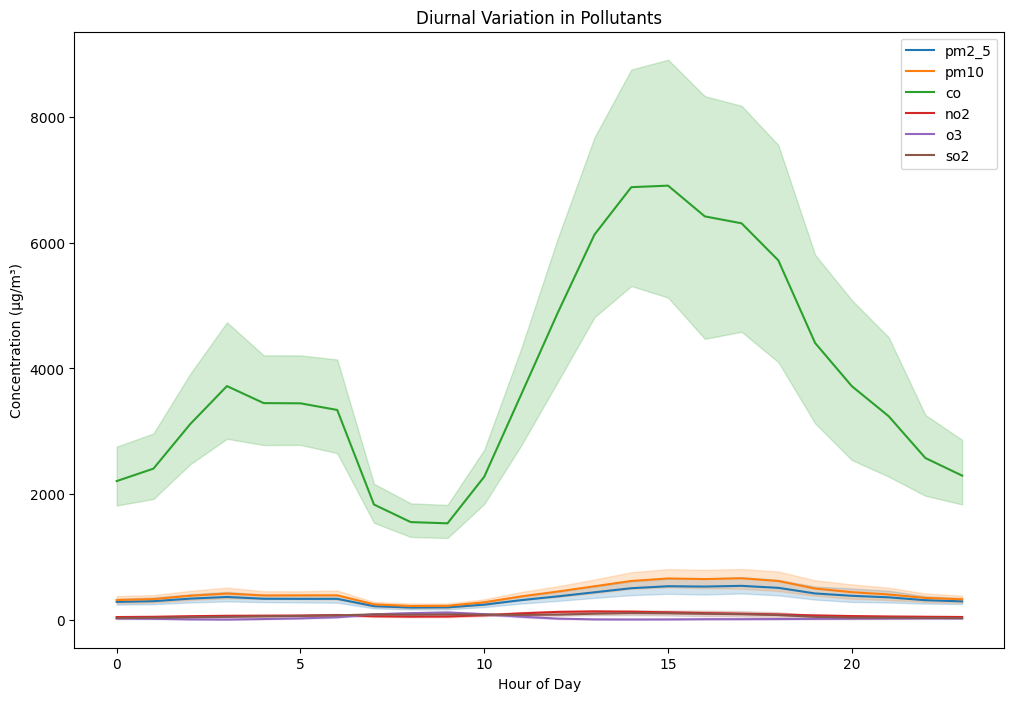

In [ ]:

plt.figure(figsize=(12, 8))for pollutant in pollutants:
    sns.lineplot(data=df, x='hour', y=pollutant, label=pollutant)

plt.xlabel('Hour of Day')
plt.ylabel('Concentration (µg/m³)')
plt.title('Diurnal Variation in Pollutants')
plt.legend()
plt.show()
